In [1]:
# just a test notebook to test out some ideas, its easier than making a script + running it

In [ ]:
# test reponse to their backend
import requests
import base64
import json
def generate(prompt):

    headers = {
        "accept": "application/json",
        "accept-language": "en-US,en;q=0.9",
        "cache-control": "no-cache",
        "content-type": "application/json",
        "pragma": "no-cache",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-site",
        "sec-gpc": "1",
        "Referer": "https://www.craiyon.com/",
        "Referrer-Policy": "strict-origin-when-cross-origin"
      }
    body = {'prompt': prompt}
    r = requests.post("https://backend.craiyon.com/generate", json=body, headers=headers )
    with open('data.json', 'w') as f:
        json.dump(r.json(), f)
    images = r.json()['images']
    for img in images[:1]:
        print(img)
        with open("imageToSave.png", "wb") as fh:
            fh.write(bytes(img, "utf-8"))

generate('bobby dodd')

In [4]:
# playing with the saved json
import json
with open('data.json', 'r') as f:
    res = json.load(f)

In [6]:
res['images']

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoICAgLCgoLDhgQDg0NDh0VFhEYIx8lJCIf\nIiEmKzcvJik0KSEiMEExNDk7Pj4+JS5ESUM8SDc9Pjv/2wBDAQoLCw4NDhwQEBw7KCIoOzs7Ozs7\nOzs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozv/wAARCAEAAQADASIA\nAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA\nAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3\nODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm\np6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA\nAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx\nBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK\nU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3\nuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDkcd6c\nBmhfT3p+K5ixQKeopAPQU8cUAAFPAoAyKcBTAUDBqRBg0gGKkUfnQBzPiOXzLwRDnYvSsyFct8xx\nVzWgW1WVu3TP4VVRSe/WmxrcuwDsoq7ApUc8571WtxhQF61djyoHQj61hI7YE8

In [13]:
import base64
import io
from PIL import Image
ims = [Image.open(io.BytesIO(base64.b64decode(i))) for i in res['images']]
ims
#badda bing bada boom 

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285A8F40>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285A92A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285AAD70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285AB0A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285AA9E0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285AAF50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285ABAC0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285AB1C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7F9F285ABBE0>]

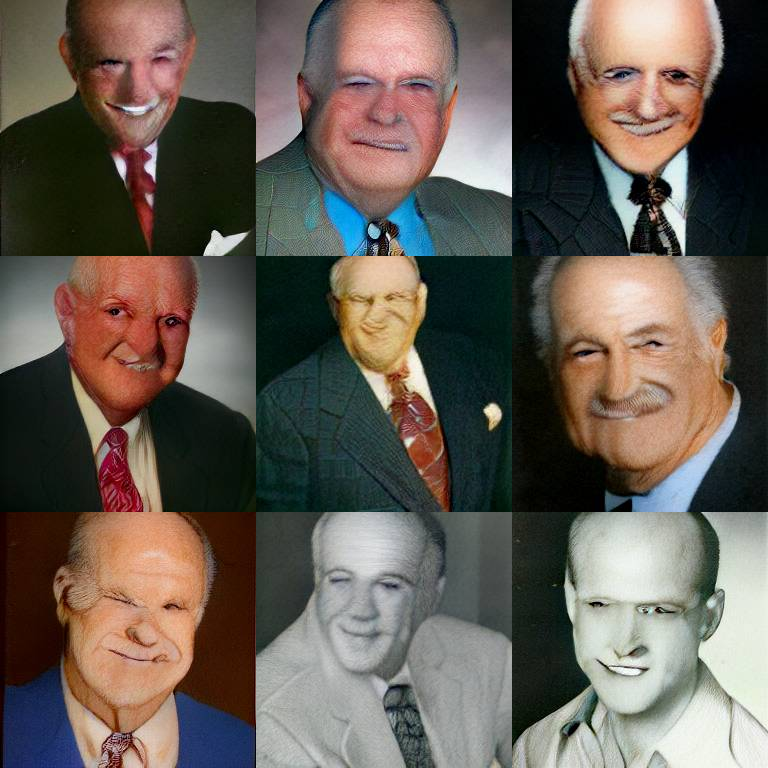

In [16]:
# copy it all together into a grid like they do and we're good to go
def make_grid(imgs):
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(3*w, 3*h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%3*w, i//3*h))
    return grid

make_grid(ims)
#yeet